In [10]:
import keras
keras.__version__

'2.2.4'

In [11]:
tf.__version__

'1.15.0'

In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 309541815319068364
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1410301542
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6201065707665490248
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [20]:
from keras import backend as K
from IPython.display import display
import PIL

# GPU 확인
config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allocator_type = 'BFC'
config.gpu_options.per_process_gpu_memory_fraction = 0.90
config.gpu_options.allow_growth = True

session = tf.Session(config=config)

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6919335995234334599, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1410301542
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 18263885644073647603
 physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [18]:
!nvidia-smi

Mon Feb 10 15:05:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 441.22       Driver Version: 441.22       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1050   WDDM  | 00000000:01:00.0  On |                  N/A |
| 45%   25C    P8    N/A /  75W |    290MiB /  2048MiB |     18%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28,28
(x_train, y_train), (x_test,y_test) = mnist.load_data()

Using TensorFlow backend.
C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_14\.conda\envs\tf_test\lib

In [2]:
# x_train=x_train.reshape(x_train.shape[0],1,28,28)
# x_test=x_test.reshape(x_test.shape[0],1,28,28)
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
x_train.shape

(60000, 28, 28, 1)

In [5]:
x_test.shape

(10000, 28, 28, 1)

In [3]:
model = Sequential()
model.add(Conv2D(32,3,3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adadelta',metrics=['accuracy'])


C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [7]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc=[]
    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
history = AccuracyHistory()
history.on_train_begin()

In [5]:
history = model.fit(x_train,y_train, batch_size=batch_size,epochs=epochs, verbose=1,validation_data=(x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 36s 599us/step - loss: 0.2766 - accuracy: 0.9148 - val_loss: 0.0592 - val_accuracy: 0.9820
Epoch 2/12
60000/60000 [==============================] - 35s 584us/step - loss: 0.0939 - accuracy: 0.9721 - val_loss: 0.0444 - val_accuracy: 0.9851
Epoch 3/12
60000/60000 [==============================] - 36s 599us/step - loss: 0.0726 - accuracy: 0.9779 - val_loss: 0.0377 - val_accuracy: 0.9875
Epoch 4/12
60000/60000 [==============================] - 36s 600us/step - loss: 0.0627 - accuracy: 0.9814 - val_loss: 0.0340 - val_accuracy: 0.9886
Epoch 5/12
60000/60000 [==============================] - 37s 611us/step - loss: 0.0548 - accuracy: 0.9833 - val_loss: 0.0305 - val_accuracy: 0.9894
Epoch 6/12
60000/60000 [==============================] - 33s 556us/step - loss: 0.0481 - accuracy: 0.9857 - val_loss: 0.0310 - val_accuracy: 0.9894
Epoch 7/12
60000/60000 [==============================]

In [7]:
score = model.evaluate(x_test,y_test,verbose=0)

In [6]:
history.history

{'val_loss': [0.059245817149430516,
  0.04435192359345965,
  0.03767200188878923,
  0.034036204631440345,
  0.030503745314804837,
  0.030976924109179526,
  0.03255471133892424,
  0.029411342433292884,
  0.02609131144086132,
  0.025586277376278305,
  0.028483195908254128,
  0.02604664741830784],
 'val_accuracy': [0.9819999933242798,
  0.9850999712944031,
  0.987500011920929,
  0.9886000156402588,
  0.9894000291824341,
  0.9894000291824341,
  0.9889000058174133,
  0.9898999929428101,
  0.9922000169754028,
  0.9916999936103821,
  0.9911999702453613,
  0.991100013256073],
 'loss': [0.276614433658123,
  0.09391396923859914,
  0.07258996130228043,
  0.06265585872431596,
  0.054794200178980824,
  0.04807858849962553,
  0.0457335446814696,
  0.04211656249860923,
  0.03977744282434384,
  0.035978180877616006,
  0.033868684663871926,
  0.03369898703992367],
 'accuracy': [0.91485,
  0.97205,
  0.97795,
  0.9813667,
  0.9833,
  0.9857,
  0.98646665,
  0.9872,
  0.9878,
  0.98871666,
  0.98976666,


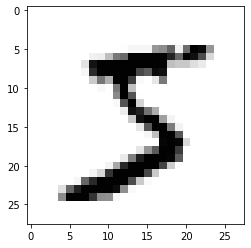

In [16]:
first_image = x_train[0,:,:]
plt.imshow(first_image, cmap=plt.cm.Greys)

In [8]:
import numpy as np

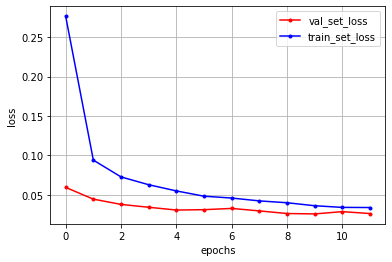

In [9]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

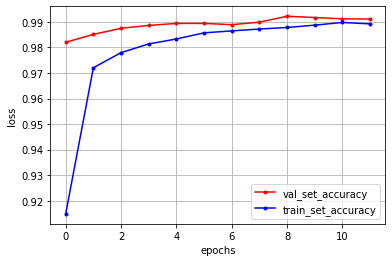

In [10]:
y_vloss = history.history['val_accuracy']
y_loss = history.history['accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_accuracy')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [37]:
from keras.callbacks import ModelCheckpoint
save_weights_only = False

In [38]:
# HDFS(hadoop file system) : model 구조 전체 저장
# 가중치, 구조, optimization statge 등이 저장
# json 으로 저장, 구조, 가중치를 별로도 저장 -> web에서 tensorflow

model.save('model_mnist.h5')
print("모델이 저장되었습니다.")
from keras.models import load_model

model = load_model('model_mnist.h5')
print("모델이 로딩됐습니다.")

model.summary

모델이 저장되었습니다.
모델이 로딩됐습니다.


<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x00000238ADA6E1C8>>

In [13]:
l1 = model.layers[0]
l2 = model.layers[1]
print(l1.name)
print(l1.input_shape)
print(l1.activation)
print(l1.output_shape)

conv2d_1
(None, 28, 28, 1)
<function relu at 0x00000238A61A3048>
(None, 26, 26, 32)


In [14]:
# imageDataGenerator

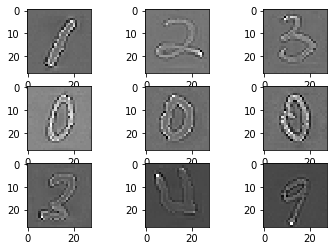

In [46]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
datagen = ImageDataGenerator(horizontal_flip = True, vertical_flip=True)
datagen = ImageDataGenerator(width_shift_range=0.2,
                            height_shift_range=0.2)
datagen = ImageDataGenerator(zca_whitening=True)
# 이미지 백색화 -> noise제거 (변수간 상관도를 없앰 : PCA)
datagen.fit(x_train)
for x_batch, y_batch in datagen.flow(x_train,y_train,batch_size=9,save_to_dir='images', save_prefix='aug', save_format='png'):
    for i in range(0,9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x_batch[i].reshape(28,28),cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break

In [10]:
from keras.datasets import cifar10
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt

(X_train, Y_train), (X_test,Y_test) = cifar10.load_data()
print('X_train shape: ', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
NB_CLASSES = 10
Y_train = np_utils.to_categorical(Y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(Y_test, NB_CLASSES)
X_train  = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /=255

X_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [2]:
Y_train.shape

(50000, 10)

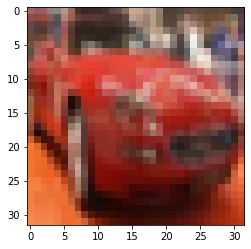

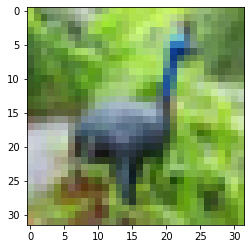

In [3]:
plt.imshow(X_train[5])
plt.grid(False)
plt.show()
plt.imshow(X_train[6])
plt.grid(False)
plt.show()

In [4]:
IMG_CHANNELS =3
IMG_ROWS = 32
IMG_COLS = 32
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10 
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [7]:
config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allocator_type = 'BFC'
config.gpu_options.per_process_gpu_memory_fraction = 0.90
config.gpu_options.allow_growth = True

session = tf.Session(config=config)

In [25]:
tf.reset_default_graph()

In [8]:
model = Sequential()
# residual망의 영향
with K.tf_ops.device('/device:GPU:0'):
    model.add(Conv2D(32, kernel_size=3,padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    model.add(Activation('relu'))
    model.add(Conv2D(32,kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64,kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64,3,3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(NB_CLASSES))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=OPTIM,metrics=['accuracy'])
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
____________________

C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  if sys.path[0] == '':


In [9]:
history = model.fit(X_train,Y_train, batch_size=BATCH_SIZE,epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 11s 275us/step - loss: 1.8194 - acc: 0.3393 - val_loss: 1.5291 - val_acc: 0.4430
Epoch 2/40
40000/40000 [==============================] - 9s 232us/step - loss: 1.3804 - acc: 0.5071 - val_loss: 1.5491 - val_acc: 0.4772
Epoch 3/40
40000/40000 [==============================] - 9s 233us/step - loss: 1.1719 - acc: 0.5853 - val_loss: 1.0450 - val_acc: 0.6277
Epoch 4/40
40000/40000 [==============================] - 9s 232us/step - loss: 1.0213 - acc: 0.6431 - val_loss: 0.9958 - val_acc: 0.6498
Epoch 5/40
40000/40000 [==============================] - 9s 232us/step - loss: 0.9216 - acc: 0.6764 - val_loss: 0.8133 - val_acc: 0.7190
Epoch 6/40
40000/40000 [==============================] - 9s 231us/step - loss: 0.8472 - acc: 0.7035 - val_loss: 0.7708 - val_acc: 0.7314
Epoch 7/40
40000/40000 [===

In [10]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=0,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False)
datagen.fit(X_train)

In [11]:

model.fit_generator(datagen.flow(X_train,Y_train,batch_size=BATCH_SIZE),
                   samples_per_epoch=X_train.shape[0],
                   nb_epoch=NB_EPOCH,
                   verbose=VERBOSE)


Epoch 1/40
  3/390 [..............................] - ETA: 19s - loss: 1.0764 - acc: 0.6667

C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., verbose=1, steps_per_epoch=390, epochs=40)`
  after removing the cwd from sys.path.


390/390 [==============================] - 16s 40ms/step - loss: 0.9948 - acc: 0.6772
Epoch 2/40
390/390 [==============================] - 16s 40ms/step - loss: 0.9568 - acc: 0.6888
Epoch 3/40
390/390 [==============================] - 16s 40ms/step - loss: 0.9438 - acc: 0.6927
Epoch 4/40
390/390 [==============================] - 16s 40ms/step - loss: 0.9285 - acc: 0.6965
Epoch 5/40
390/390 [==============================] - 15s 40ms/step - loss: 0.9250 - acc: 0.6958
Epoch 6/40
390/390 [==============================] - 16s 40ms/step - loss: 0.9220 - acc: 0.6981
Epoch 7/40
390/390 [==============================] - 16s 40ms/step - loss: 0.9134 - acc: 0.7028
Epoch 8/40
390/390 [==============================] - 15s 40ms/step - loss: 0.9112 - acc: 0.7013
Epoch 9/40
390/390 [==============================] - 15s 39ms/step - loss: 0.9142 - acc: 0.6996
Epoch 10/40
390/390 [==============================] - 15s 40ms/step - loss: 0.9163 - acc: 0.6997
Epoch 11/40
390/390 [===================

In [ ]:
from numba import cuda
cuda.close()

In [34]:
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

NameError: name 'model' is not defined

In [2]:
score = model.evaluate(X_test,Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print('\n Test score:',score[0])
print('\n Test accuracy', score[1])


NameError: name 'model' is not defined

In [3]:
from keras.models import model_from_json
json_file = open('cifar10_architecture.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("cifar10_weights.h5")
print(" Loaded model from disk")






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

 Loaded model from disk


In [3]:
# 1. acuuracy graph를 출력
# 2. 이미지 cat,dog 를 다운로드한다음 위 모델로 예측해보시오ㅓ

In [14]:
from numba import cuda
cuda.close()

In [ ]:
import numpy as np
from imageio import imread
from skimage.transform import resize

img_names = ['cat.jpg', 'dog.jpg']
imgs = [resize(imread(img_name), (32,32)).astype('float32') for img_name in img_names]
imgs = np.array(imgs) / 255
predictions = loaded_model.predict_classes(imgs)
print(predictions)

In [ ]:
# 전이학습 
- 반지도학습 (일부데이터의 라벨이무) : KNN , Trenductive SVM
- 가중치 활용 : 그대로적용
- 가중치 중 일부만 활용
- FFNN 부분만 학습해서 사용

In [ ]:
# pre -trained, fine - tuning (FFNN부분만 Domain knowledge)

PIL image size (224, 224)


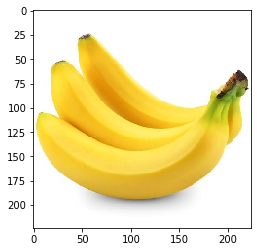

numpy array size (224, 224, 3)
image array size (1, 224, 224, 3)








FailedPreconditionError: 2 root error(s) found.
  (0) Failed precondition: Failed to memcopy into scratch buffer for device 0
	 [[{{node _SOURCE}}]]
  (1) Failed precondition: Failed to memcopy into scratch buffer for device 0
	 [[{{node _SOURCE}}]]
	 [[bn_conv1/IsVariableInitialized_1/_3]]
0 successful operations.
0 derived errors ignored.

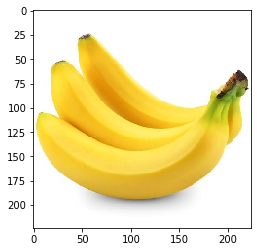

In [16]:
import PIL
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50
filename = 'banana.jpg'
original = load_img(filename, target_size=(224,224))
print('PIL image size', original.size)
plt.imshow(original)
plt.show()
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
print('numpy array size' , numpy_image.shape)
image_batch=np.expand_dims(numpy_image, axis=0)
print('image array size' , image_batch.shape)
#prepare the image for the resnet50 model
precessed_image = resnet50.preprocess_input(image_batch.copy())
# dense 를 이용해서 모델을 생성
# 라벨 -> 확률값
resnet_model = resnet50.ResNet50(weights = 'imagenet')
# softmax 화귤ㄹ (상위 3개로 예측)
predictions = resnet_model.predict(precessed_image)
label = decode_predictions(predictions) # labelling
print(label)

In [22]:
tf.__version__

'1.14.0'

In [15]:
from numba import cuda
cuda.close()

In [1]:
from numpy.random import randn
import pathlib
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from matplotlib.image import imread
from keras.preprocessing import image
#tf.enable_eager_execution()
AUTOTUNE = tf.data.experimental.AUTOTUNE
data_dir = 'C:/Users/ICT01_14/Desktop/전달/flowers/flower_photos'
data_dir = pathlib.Path(data_dir)
label_names ={'daisy':0,'dandelion':1,'roses':2,'sunflowers':3,'tulips':4}
label_key=['daisy','dandelion','roses','sunflowers','tulips']

Using TensorFlow backend.


In [2]:
all_images = list(data_dir.glob('*/*'))
all_images = [str(path) for path in all_images]
random.shuffle(all_images)
all_labels=[label_names[pathlib.Path(path).parent.name] for path in all_images]
data_size = len(all_images)
train_test_split=(int)(data_size*0.2)
x_train = all_images[train_test_split:]
x_test = all_images[:train_test_split]
y_train = all_labels[train_test_split:]
y_test = all_labels[:train_test_split]
img_size = 160
batch_size = 32

In [3]:
def _parse_data(x,y):
    image = tf.read_file(x)
    image = tf.image.decode_jpeg(image, channels= 3)
    image = tf.cast(image,tf.float32)
    image = (image/127.5) -1 
    image = tf.image.resize(image, (img_size, img_size))
    return image,y 
def _input_fn(x,y):
    ds = tf.data.Dataset.from_tensor_slices((x,y))
    ds = ds.map(_parse_data)
    ds = ds.shuffle(buffer_size=data_size)
    ds = ds.repeat()
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds
train_ds = _input_fn(x_train,y_train)
validation_ds = _input_fn(x_test, y_test)

In [4]:
IMG_SHAPE = (img_size,img_size,3)
VGG16_MODEL = tf.keras.applications.VGG16(input_shape = IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
VGG16_MODEL.trainable =False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(len(label_names),activation='softmax')

import keras.backend.tensorflow_backend as K
config = tf.ConfigProto(allow_soft_placement=True)
#config.gpu_options.allocator_type = 'BFC'
#config.gpu_options.per_process_gpu_memory_fraction = 0.90
config.gpu_options.allow_growth = True

session = tf.Session(config=config)

In [6]:
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
config = tf.ConfigProto(gpu_options=gpu_options)
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [10]:
import keras.backend.tensorflow_backend as K
with K.tf_ops.device('/device:GPU:0'):
    model = tf.keras.Sequential([VGG16_MODEL, global_average_layer,prediction_layer])
    model.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])
    # sparse 희소행렬

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 5, 5, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 2565      
Total params: 14,717,253
Trainable params: 2,565
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
history = model.fit(train_ds, epochs =100, steps_per_epoch=2)

Train on 2 steps
Epoch 1/100


InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument: {{function_node __inference_Dataset_map__parse_data_21}} Invalid JPEG data or crop window, data size 2636
	 [[{{node DecodeJpeg}}]]
	 [[IteratorGetNext_1]]
	 [[IteratorGetNext_1/_235]]
  (1) Invalid argument: {{function_node __inference_Dataset_map__parse_data_21}} Invalid JPEG data or crop window, data size 2636
	 [[{{node DecodeJpeg}}]]
	 [[IteratorGetNext_1]]
0 successful operations.
0 derived errors ignored.